In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import spacy

def load_filter():
    nlp = spacy.load("de_core_news_sm")
    filterwords = spacy.lang.de.stop_words.STOP_WORDS
    with open("../docs/filterwords.txt", encoding="utf-8", errors="ignore") as d:
        filterwords.update(d.read().split())
    with open("../docs/german_stopwords_full.txt", encoding="utf-8", errors="ignore") as d:
        filterwords.update(d.read().split()[53:])
    return list(set(filterwords))

stop_words = frozenset(load_filter())

In [ ]:
df = pd.read_pickle('../data/topics_by_minute/topics_by_minute.pkl')
df.dropna(subset=['transcript'], inplace=True)
docs = df['transcript'].to_numpy()

In [ ]:
vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))
topic_model = BERTopic(vectorizer_model = vectorizer_model, verbose=1, language='German', min_topic_size=500)

In [ ]:
topics, probs = topic_model.fit_transform(docs)
topic_model.save('bertopic_model')

In [ ]:
#topic_model = BERTopic.load('bertopic_model')
#topics, probs = topic_model.transform(docs)

In [5]:
topic_info = topic_model.get_topic_info()

In [6]:
topic_model.visualize_topics()

In [7]:
topic_model.visualize_barchart()

In [8]:
topic_model.visualize_hierarchy()

In [ ]:
tmp = topic_model.find_topics('schule')
topic_model.get_topic(topic=tmp[0][0])
#topic_model.get_representative_docs(topic=tmp[0][0])

In [ ]:
topic_model.get_params()

In [ ]:
topics_per_class = topic_model.topics_per_class(docs, topics, classes=df['medium'])
topic_model.visualize_topics_per_class(topics_per_class)

In [ ]:
#new_topics, new_probs = topic_model.reduce_topics(docs, topics, nr_topics='auto')
#new_topic_info = topic_model.get_topic_info()

In [ ]:
topic_model.get_topic(topic=13)

In [ ]:
topic_model.get_representative_docs(topic=13)

In [ ]:
topic_dict = pd.Series(topic_info.Name.values,index=topic_info.Topic).to_dict()
df['topic'] = topics
df['topic'] = df['topic'].apply(lambda row: topic_dict[row])
df['topic_probabilites'] = probs

In [ ]:
#df.to_pickle('../data/topics_by_minute/topics_by_minute_bertopic.pkl')

In [4]:
topic_model = BERTopic.load('bertopic_model')
df = pd.read_pickle('../data/topics_by_minute/topics_by_minute_bertopic.pkl')

In [12]:
timestamps = df['date'].to_numpy()
topics = df['topic'].to_numpy()
docs = df['transcript'].to_numpy()

In [13]:
topics_over_time = topic_model.topics_over_time(docs, topics, timestamps)
topics_over_time.to_pickle('topics_over_time.pkl')

3754it [3:05:29,  2.96s/it] 


In [18]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[22])

<AxesSubplot:xlabel='Timestamp', ylabel='Frequency'>

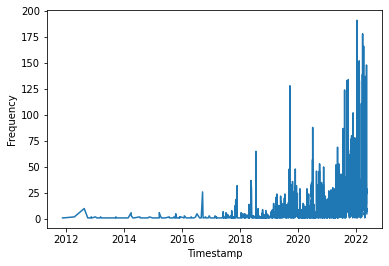

In [31]:
test = topics_over_time.loc[topics_over_time['Topic'] =='4_co2_klimaschutz_klima_energien']
sns.lineplot(x='Timestamp', y='Frequency', data=test)